In [ ]:
!ls

drive  sample_data


In [ ]:
!cd /content/drive/MyDrive/Datasets/

In [ ]:
!ls

drive  sample_data


# **Loading Structured Data**

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd

In [ ]:
dfIris= pd.read_csv("/content/drive/MyDrive/Datasets/iris.csv")

In [ ]:
dfIris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
dfIris["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
{val:ind for ind , val in enumerate(dfIris["variety"].unique())}

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

In [ ]:
class Iris(Dataset):
  def __init__(self,target_col_name = "variety"):
    self.df = pd.read_csv("/content/drive/MyDrive/Datasets/iris.csv")
    x = self.df.drop(target_col_name,axis=1).to_numpy()
    self.x = torch.from_numpy(x)

    replacement_dict = {'Setosa':0,'Versicolor':1,'Virginica':2}
    y = self.df[target_col_name].replace(replacement_dict).to_numpy()
    self.y = torch.from_numpy(y)

  def __getitem__(self,index):
    return self.x[index],self.y[index]
  
  def __len__(self):
    return self.df.shape[0]

In [ ]:
dfIris.shape

(150, 5)

In [ ]:
IrisData = Iris()
len(IrisData)

150

In [ ]:
Iris_Data_Loader = DataLoader(IrisData,batch_size = 5)

In [ ]:
for data in Iris_Data_Loader:
  x,y = data
  print(f"Independent col data : {x}, \n target_col: {y}")
  break

Independent col data : tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]], dtype=torch.float64), 
 target_col: tensor([0, 0, 0, 0, 0])


In [ ]:
Iris_Data_Loader = DataLoader(IrisData,batch_size = 5,shuffle=True)

In [ ]:
for data in Iris_Data_Loader:
  x,y = data
  print(f"Independent col data : {x}, \n target_col: {y}")
  break

Independent col data : tensor([[4.6000, 3.1000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [6.3000, 3.4000, 5.6000, 2.4000]], dtype=torch.float64), 
 target_col: tensor([0, 0, 1, 1, 2])


# **Loading UnStructured Data**

In [ ]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
train_path = "/content/drive/MyDrive/Datasets/train"
val_path = "content/drive/MyDrive/Datasets/val"
test_path = "content/drive/MyDrive/Datasets/test"


In [ ]:
HeightImage , WidthImage , Channel = (224,224,3)

ImageSize = (HeightImage,WidthImage)

train_transform = transforms.Compose([
                  transforms.Resize(ImageSize),
                  transforms.ToTensor()
])

val_transform = transforms.Compose([
                transforms.Resize(ImageSize),
                transforms.ToTensor()
])

In [ ]:
trainData = datasets.ImageFolder(root = train_path,transform=train_transform)
trainData_loader = DataLoader(trainData,batch_size = 4 , shuffle = True)

In [ ]:
len(trainData_loader)

199

In [ ]:
data  = next(iter(trainData_loader))

In [ ]:
len(data)

2

In [ ]:
data[0].shape

torch.Size([4, 3, 224, 224])

In [ ]:
data[1].shape

torch.Size([4])

Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats

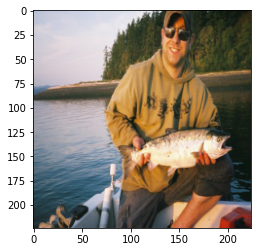

In [ ]:
plt.imshow(transforms.ToPILImage()(data[0][0]))